In [1]:
import warnings
warnings.filterwarnings('ignore')

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import json
import scipy.stats as stats

In [2]:
# data clean up- missing counts etc

# stats summary: count by city, severity by weather condition etc

# histogram :
#     date
#     time
#     temperature
#     windchill
#     humidity
#     pressure 
# linear regression : severity of accident 
    
    
    
# heat map of # of accidents

# bar char or pie chart # of accidents vs  POI

# severity 

# correlation of # of accidents to all factors(how to deal with discountinous factors)



In [3]:

df = pd.read_csv('data/US_Accidents_Dec19.csv',encoding='utf-8')
df.head()
#outputs: Number of accidents, Severity, Distance
#do something with the description??
#side of street
#value count by percent?

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.246264e+06,2.974335e+06,2.974335e+06,2.974335e+06,728071.000000,728071.000000,2.974335e+06,1.056730e+06,2.918272e+06,1.121712e+06,2.915162e+06,2.926193e+06,2.908644e+06,2.533495e+06,975977.000000
mean,2.078316e+02,2.360190e+00,3.649361e+01,-9.542625e+01,37.580871,-99.976032,2.855654e-01,5.837004e+03,6.235120e+01,5.132685e+01,6.540542e+01,2.983190e+01,9.150770e+00,8.298064e+00,0.020495
std,2.032959e+01,5.414733e-01,4.918849e+00,1.721881e+01,5.004757,18.416647,1.548392e+00,1.515928e+04,1.878855e+01,2.519127e+01,2.255676e+01,7.213808e-01,2.892114e+00,5.138546e+00,0.235770
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,24.570110,-124.497829,0.000000e+00,0.000000e+00,-7.780000e+01,-6.590000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.010000e+02,2.000000e+00,3.355040e+01,-1.172920e+02,33.957554,-118.286610,0.000000e+00,8.370000e+02,5.000000e+01,3.200000e+01,4.900000e+01,2.982000e+01,1.000000e+01,4.600000e+00,0.000000
50%,2.010000e+02,2.000000e+00,3.584969e+01,-9.025083e+01,37.903670,-96.631690,0.000000e+00,2.717000e+03,6.440000e+01,5.400000e+01,6.700000e+01,2.998000e+01,1.000000e+01,7.000000e+00,0.000000
75%,2.010000e+02,3.000000e+00,4.037026e+01,-8.091891e+01,41.372630,-82.323850,1.000000e-02,7.000000e+03,7.600000e+01,7.300000e+01,8.400000e+01,3.011000e+01,1.000000e+01,1.040000e+01,0.000000
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,49.075000,-67.109242,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,3.304000e+01,1.400000e+02,8.228000e+02,25.000000


In [6]:
columns_of_interest=['ID','Severity','Start_Time','End_Time','Start_Lat', 'Start_Lng', 'City', 'County', 'State',
       'Zipcode', 'Country','Visibility(mi)', 'Weather_Condition','Precipitation(in)','Sunrise_Sunset','Civil_Twilight']
condition=df['State'] =='TX'
txDF=df[condition][columns_of_interest]

txDF.head()

txDF['City'].value_counts()

Houston              93245
Austin               58553
Dallas               57823
San Antonio          21613
El Paso               9352
                     ...  
Sinton                   1
San Antonio North        1
Whitsett                 1
Bonham                   1
Pantego                  1
Name: City, Length: 713, dtype: int64

In [7]:
txDF=df[condition]
txDF.head()


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
261007,A-261009,MapQuest,201.0,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
261008,A-261010,MapQuest,201.0,2,2016-11-30 16:32:18,2016-11-30 17:47:02,30.328165,-97.694305,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
261009,A-261011,MapQuest,201.0,2,2016-11-30 16:31:45,2016-11-30 17:46:34,30.326077,-97.692307,NaN,NaN,...,False,True,False,False,True,False,Day,Day,Day,Day
261010,A-261012,MapQuest,201.0,2,2016-11-30 16:06:49,2016-11-30 17:27:00,32.856014,-97.513084,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
261011,A-261013,MapQuest,201.0,3,2016-11-30 16:35:01,2016-11-30 17:49:39,32.797668,-97.212090,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


Text(0, 0.5, 'Number of Accidents')

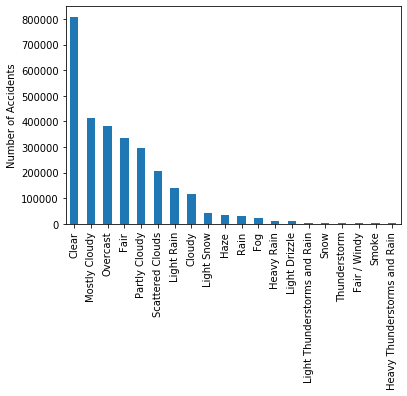

In [8]:
axes= df["Weather_Condition"].value_counts().head(20).plot.bar()
axes.set_ylabel("Number of Accidents")


Text(0, 0.5, 'Number of Accidents')

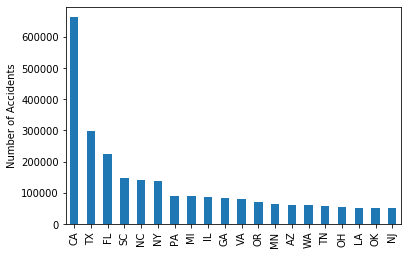

In [9]:
axes=number_accident_vs_weather= df["State"].value_counts().head(20).plot.bar()
axes.set_ylabel("Number of Accidents")

Text(0.5, 0, 'Amenity')

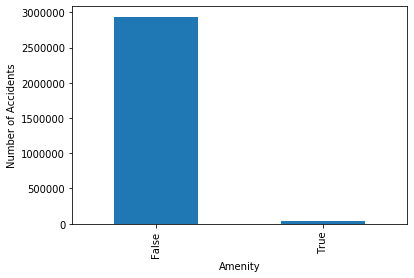

In [10]:
axes=number_accident_vs_weather= df["Amenity"].value_counts().head(20).plot.bar()
axes.set_ylabel("Number of Accidents")
axes.set_xlabel("Amenity")

Text(0.5, 0, 'Roundabout')

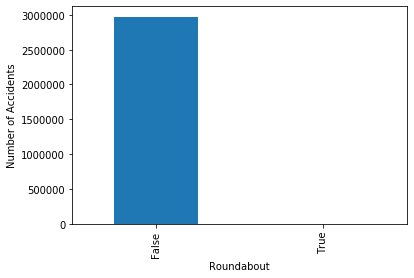

In [11]:
axes=number_accident_vs_weather= df["Roundabout"].value_counts().head(20).plot.bar()
axes.set_ylabel("Number of Accidents")
axes.set_xlabel("Roundabout")

Text(0.5, 0, 'Bump')

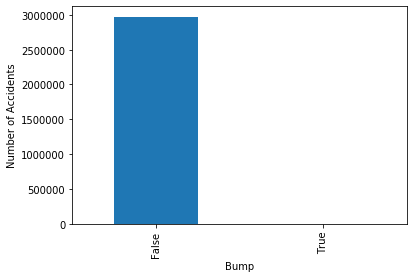

In [12]:
axes=number_accident_vs_weather= df["Bump"].value_counts().head(20).plot.bar()
axes.set_ylabel("Number of Accidents")
axes.set_xlabel("Bump")

In [13]:
# Is severity affected by Bump, Roundabout, etc?
#statistical significance?
df.groupby("Bump")["Severity"].mean()

Bump
False    2.360227
True     2.121145
Name: Severity, dtype: float64

In [15]:
# t-test 
severity_bump= df[df["Bump"]==True]["Severity"]
severity_no_bump= df[df["Bump"]==False]["Severity"]


stats.ttest_ind(severity_bump, severity_no_bump, equal_var=False)

Ttest_indResult(statistic=-14.442668956532955, pvalue=3.634591459976564e-39)

2973881


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1dbbfc50>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1dc50d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1dbbfc10>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1ff83c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ff65e50>],
 'means': []}

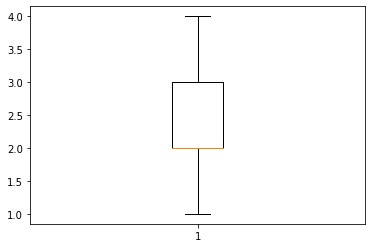

In [20]:
print(len(severity_no_bump))
fig, ax = plt.subplots()
ax.boxplot(severity_no_bump)

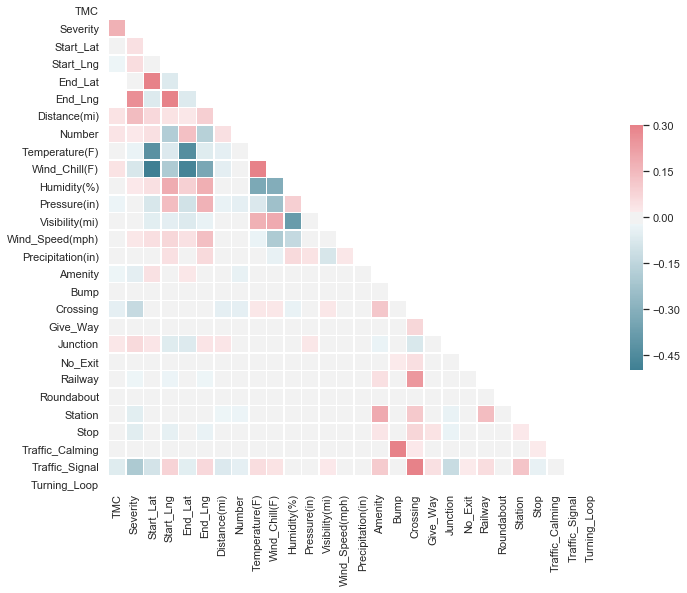

In [52]:
sb.set(style="white")


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [62]:
dfBump=df["Bump"].value_counts()

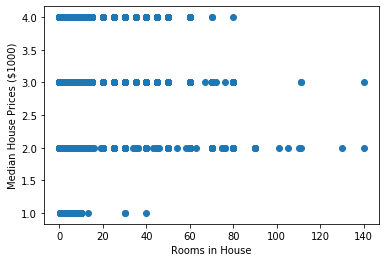

In [22]:
# Plot out rooms versus median house price
y_values = df['Severity']
x_values = df['Visibility(mi)']
plt.scatter(x_values,y_values)
plt.xlabel('Visibility(mi)')
plt.ylabel('Severity')
plt.show()

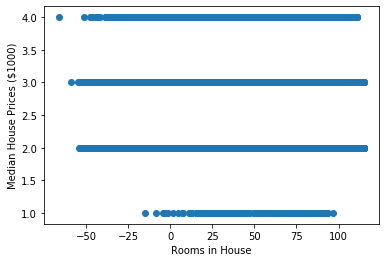

In [23]:
# Plot out rooms versus median house price
y_values = df['Severity']
x_values = df['Wind_Chill(F)']
plt.scatter(x_values,y_values)
plt.xlabel('Wind Chill(F)')
plt.ylabel('Severity')
plt.show()

In [ ]:
# Add the linear regression equation and line to plot
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()